### Install the Gemini Python SDK ✅

In [1]:
pip install -q -U google-generativeai

## Install required Libraries ✅

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

In [3]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Get your API Key here: https://makersuite.google.com/app/apikey

In [4]:
GOOGLE_API_KEY = "Enter your Google API key"

genai.configure(api_key=GOOGLE_API_KEY)


## Model List ✅

Currently available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Text Generation from Textual Inputs ✅

In [6]:
model = genai.GenerativeModel('gemini-pro')

In [8]:
response = model.generate_content("How good is Ayurvedic treatment for spinal lordosis and lumbar spondylosis")

In [9]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [10]:
response.candidates

[content {
  parts {
    text: "The effectiveness of Ayurvedic treatment for spinal lordosis and lumbar spondylosis can vary depending on individual cases and the severity of the condition. Ayurveda, a traditional Indian system of medicine, emphasizes the balance of the body\'s energies (doshas) and utilizes various treatment modalities such as herbal medicines, dietary changes, lifestyle modifications, and specific therapies. Here\'s an overview of the potential benefits and limitations of Ayurvedic treatment for these conditions:\n\n1. Herbal Medicines:\n   - Certain Ayurvedic herbs, such as Guggul (Commiphora mukul), Ashwagandha (Withania somnifera), and Boswellia (Boswellia serrata), have anti-inflammatory and pain-relieving properties. These herbs may help reduce inflammation, alleviate pain, and improve spinal mobility.\n\n2. Dietary Changes:\n   - Ayurveda recommends eating a balanced diet that includes plenty of fruits, vegetables, whole grains, and legumes. Avoiding processed 

## Text Generation from Image and Text inputs ✅

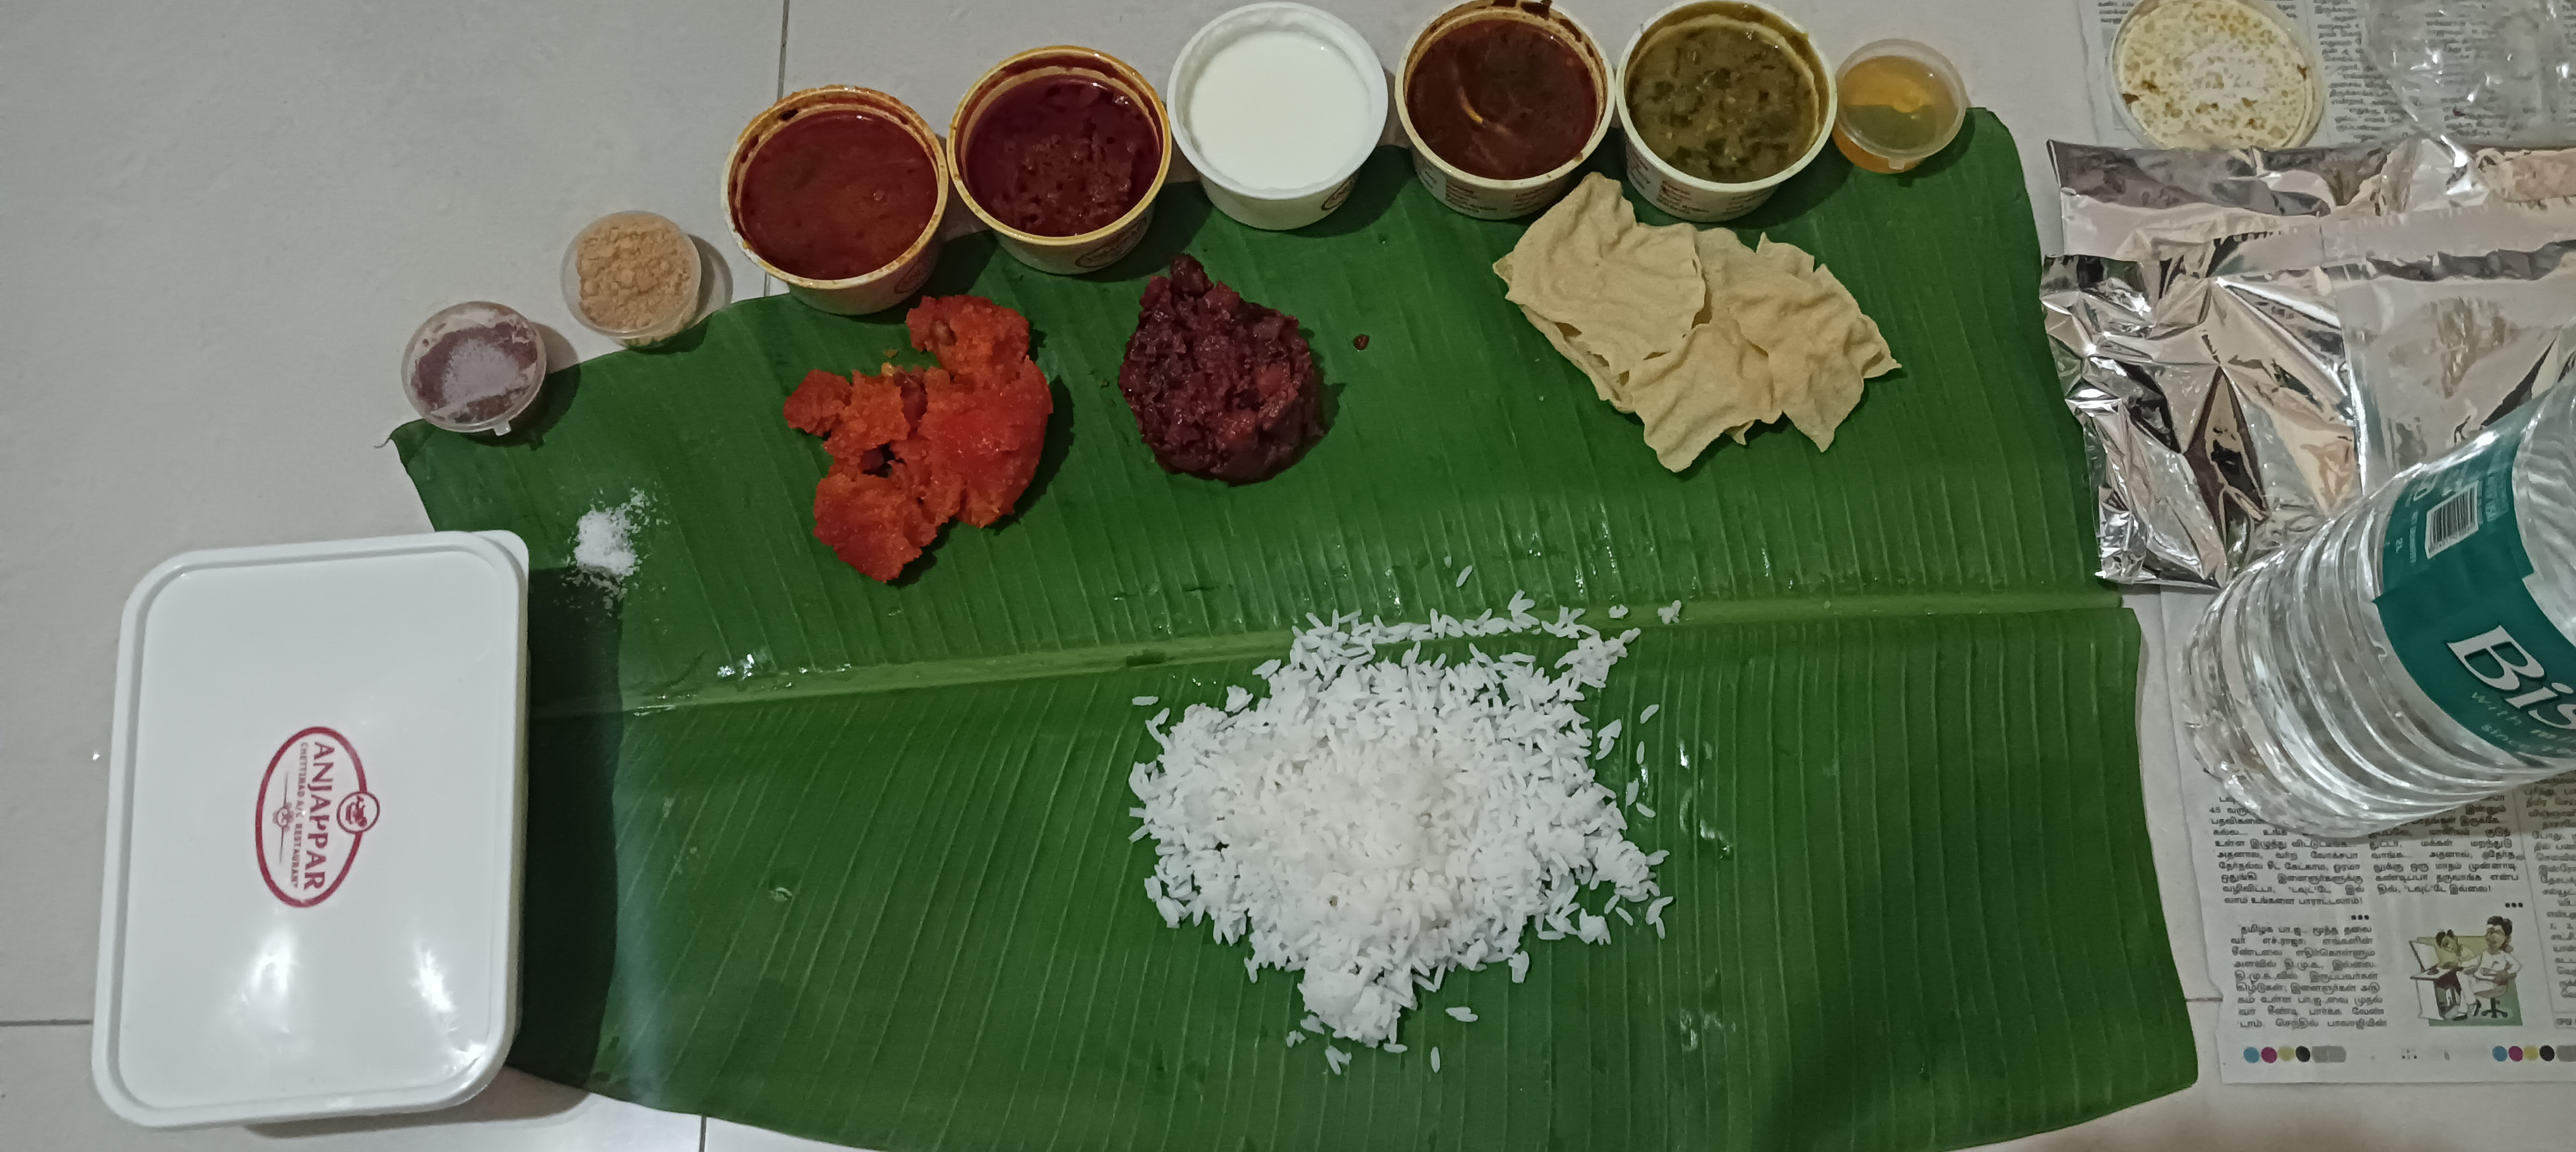

In [11]:
import PIL.Image

img = PIL.Image.open('/content/AI_img_Testing.jpeg')
img

In [12]:
model = genai.GenerativeModel('gemini-pro-vision')

In [13]:
response = model.generate_content(img)

response.text

' A banana leaf platter with rice, sambar, rasam, curd, chicken, mutton, potato fry, papad, and pickle.'

In [14]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [15]:
to_markdown(response.text)

>  South Indian Food
> 
> I've been on a journey to eat healthier and save money, and meal prepping has been a great way to do both. I've been experimenting with different recipes and cuisines, and I'm always looking for new ideas.
> 
> This week, I decided to try my hand at South Indian food. I made a big batch of chicken curry, sambar, and rasam, and I paired it with some rice and papadums. It was delicious, and it was so much cheaper than eating out.
> 
> I'm really enjoying my journey with meal prepping. It's been a great way to learn new recipes, save money, and eat healthier. I'm excited to see what I can create next!

In [16]:
response = model.generate_content(["How can I increase my Protein intake w.r.t this meal.", img], stream=True)
response.resolve()

In [17]:
to_markdown(response.text)

>  1. Add more protein-rich foods to your meal. Some good options include chicken, fish, tofu, tempeh, lentils, and beans.
> 2. Choose whole grains over refined grains. Whole grains are a good source of fiber and protein.
> 3. Add a protein shake to your meal. Protein shakes are a quick and easy way to increase your protein intake.
> 4. Snack on protein-rich foods throughout the day. Some good options include nuts, seeds, yogurt, and cheese.

## Chat Conversations like ChatGPT ✅

Gemini enables you to have freeform conversations across multiple turns. The ChatSession class simplifies the process by managing the state of the conversation, so unlike with generate_content, you do not have to store the conversation history as a list.

In [18]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [19]:
response = chat.send_message("How to become a strong Data Scientist. Explain this to a school student.")
to_markdown(response.text)

> 1. **Build a Strong Foundation in Math and Statistics**:
>    - Focus on topics like calculus, linear algebra, and probability.
>    - Understand statistical concepts like hypothesis testing and regression analysis.
>    - Practice solving mathematical and statistical problems.
> 
> 2. **Gain Programming Skills**:
>    - Learn programming languages like Python, R, or Scala.
>    - Master data manipulation and cleaning techniques.
>    - Develop skills in data visualization and presentation.
> 
> 3. **Explore Data Science Tools and Techniques**:
>    - Familiarize yourself with data science libraries and frameworks.
>    - Learn about machine learning algorithms and their applications.
>    - Understand natural language processing and text analysis techniques.
> 
> 4. **Develop Problem-Solving and Analytical Thinking Skills**:
>    - Practice solving real-world data science problems.
>    - Analyze data to identify patterns, trends, and insights.
>    - Develop critical thinking skills and the ability to communicate findings clearly.
> 
> 5. **Engage in Hands-On Projects**:
>    - Work on personal data science projects or participate in hackathons.
>    - Collaborate with others to tackle challenging data science problems.
>    - Build a portfolio of projects to showcase your skills and knowledge.
> 
> 6. **Stay Updated with the Latest Trends**:
>    - Follow industry blogs, conferences, and online courses to stay current.
>    - Read research papers and articles to learn about new techniques and advancements.
>    - Attend workshops and seminars to expand your knowledge and network with experts.
> 
> 7. **Seek Feedback and mentorship**:
>    - Ask for feedback on your projects from experienced data scientists.
>    - Seek mentorship from professionals in the field to guide your learning and career.
>    - Join online communities and forums to connect with peers and learn from their experiences.
> 
> 8. **Pursue Higher Education**:
>    - Consider pursuing a bachelor's or master's degree in data science or a related field.
>    - Look for programs that offer a strong foundation in math, statistics, programming, and data science techniques.
>    - Participate in research projects to gain hands-on experience.
> 
> 9. **Seek Real-World Experience**:
>    - Apply for internships or entry-level data science positions.
>    - Volunteer your skills on data science projects for non-profit organizations.
>    - Build a strong resume and cover letter highlighting your skills and accomplishments.
> 
> 10. **Maintain a Growth Mindset**:
>     - Be open to learning and adapting to new challenges.
>     - Embrace failures as opportunities to learn and improve.
>     - Continuously seek ways to enhance your skills and knowledge in the ever-evolving field of data science.

In [20]:
chat.history

[parts {
   text: "How to become a strong Data Scientist. Explain this to a school student."
 }
 role: "user",
 parts {
   text: "1. **Build a Strong Foundation in Math and Statistics**:\n   - Focus on topics like calculus, linear algebra, and probability.\n   - Understand statistical concepts like hypothesis testing and regression analysis.\n   - Practice solving mathematical and statistical problems.\n\n2. **Gain Programming Skills**:\n   - Learn programming languages like Python, R, or Scala.\n   - Master data manipulation and cleaning techniques.\n   - Develop skills in data visualization and presentation.\n\n3. **Explore Data Science Tools and Techniques**:\n   - Familiarize yourself with data science libraries and frameworks.\n   - Learn about machine learning algorithms and their applications.\n   - Understand natural language processing and text analysis techniques.\n\n4. **Develop Problem-Solving and Analytical Thinking Skills**:\n   - Practice solving real-world data science 

In [24]:
response.resolve()

In [25]:
response = chat.send_message("Okay, how about a explanation to Senior Python Developer ?")

In [26]:
to_markdown(response.text)

> To become a strong Data Scientist with a background in Python development, you can follow these steps:
> 
> 1. **Deepen Your Understanding of Data Science Concepts**:
>    - Study topics like machine learning, statistical analysis, natural language processing, and data visualization.
>    - Learn about supervised and unsupervised learning algorithms, feature engineering techniques, and model evaluation metrics.
>    - Practice solving data science problems using Python libraries and frameworks.
> 
> 2. **Master Advanced Python Skills**:
>    - Develop proficiency in data manipulation and cleaning using libraries like Pandas, NumPy, and SciPy.
>    - Learn to work with large datasets using tools like Dask and Apache Spark.
>    - Explore advanced Python concepts like object-oriented programming, functional programming, and decorators.
> 
> 3. **Gain Expertise in Data Science Libraries and Tools**:
>    - Familiarize yourself with popular data science libraries such as scikit-learn, TensorFlow, PyTorch, and Keras.
>    - Learn to use data visualization tools like Matplotlib, Seaborn, and Plotly to effectively communicate your findings.
>    - Explore cloud platforms like AWS, Azure, and Google Cloud for data storage, processing, and analysis.
> 
> 4. **Develop Strong Problem-Solving and Analytical Skills**:
>    - Work on real-world data science projects to apply your skills and knowledge.
>    - Analyze data to identify patterns, trends, and insights that can drive business decisions.
>    - Develop critical thinking skills and the ability to communicate your findings clearly and concisely.
> 
> 5. **Stay Updated with the Latest Trends and Advancements**:
>    - Follow industry blogs, conferences, and online courses to stay current with the latest developments in data science and Python.
>    - Read research papers and articles to learn about new techniques and methodologies.
>    - Attend workshops and seminars to expand your knowledge and network with experts in the field.
> 
> 6. **Seek Feedback and Mentorship**:
>    - Ask for feedback on your projects from experienced data scientists and Python developers.
>    - Seek mentorship from professionals in the field to guide your learning and career.
>    - Join online communities and forums to connect with peers and learn from their experiences.
> 
> 7. **Contribute to Open Source Projects**:
>    - Contribute to open source data science projects on platforms like GitHub.
>    - Collaborate with others to solve challenging problems and learn from their approaches.
>    - Showcase your contributions in your portfolio to demonstrate your skills and passion for data science.
> 
> 8. **Pursue Continuous Learning**:
>    - Consider pursuing a master's degree or specialized courses in data science or machine learning.
>    - Engage in online courses, workshops, and hackathons to continuously expand your knowledge and skills.
>    - Stay updated with the latest advancements in Python and data science through blogs, conferences, and industry publications.
> 
> By following these steps, you can enhance your skills as a Python developer and become a well-rounded Data Scientist capable of tackling complex data-driven challenges.

Let's print all our chat history as user-model responses.

In [27]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: How to become a strong Data Scientist. Explain this to a school student.

> **model**: 1. **Build a Strong Foundation in Math and Statistics**:
>    - Focus on topics like calculus, linear algebra, and probability.
>    - Understand statistical concepts like hypothesis testing and regression analysis.
>    - Practice solving mathematical and statistical problems.
> 
> 2. **Gain Programming Skills**:
>    - Learn programming languages like Python, R, or Scala.
>    - Master data manipulation and cleaning techniques.
>    - Develop skills in data visualization and presentation.
> 
> 3. **Explore Data Science Tools and Techniques**:
>    - Familiarize yourself with data science libraries and frameworks.
>    - Learn about machine learning algorithms and their applications.
>    - Understand natural language processing and text analysis techniques.
> 
> 4. **Develop Problem-Solving and Analytical Thinking Skills**:
>    - Practice solving real-world data science problems.
>    - Analyze data to identify patterns, trends, and insights.
>    - Develop critical thinking skills and the ability to communicate findings clearly.
> 
> 5. **Engage in Hands-On Projects**:
>    - Work on personal data science projects or participate in hackathons.
>    - Collaborate with others to tackle challenging data science problems.
>    - Build a portfolio of projects to showcase your skills and knowledge.
> 
> 6. **Stay Updated with the Latest Trends**:
>    - Follow industry blogs, conferences, and online courses to stay current.
>    - Read research papers and articles to learn about new techniques and advancements.
>    - Attend workshops and seminars to expand your knowledge and network with experts.
> 
> 7. **Seek Feedback and mentorship**:
>    - Ask for feedback on your projects from experienced data scientists.
>    - Seek mentorship from professionals in the field to guide your learning and career.
>    - Join online communities and forums to connect with peers and learn from their experiences.
> 
> 8. **Pursue Higher Education**:
>    - Consider pursuing a bachelor's or master's degree in data science or a related field.
>    - Look for programs that offer a strong foundation in math, statistics, programming, and data science techniques.
>    - Participate in research projects to gain hands-on experience.
> 
> 9. **Seek Real-World Experience**:
>    - Apply for internships or entry-level data science positions.
>    - Volunteer your skills on data science projects for non-profit organizations.
>    - Build a strong resume and cover letter highlighting your skills and accomplishments.
> 
> 10. **Maintain a Growth Mindset**:
>     - Be open to learning and adapting to new challenges.
>     - Embrace failures as opportunities to learn and improve.
>     - Continuously seek ways to enhance your skills and knowledge in the ever-evolving field of data science.

> **user**: Okay, how about a explanation to Senior Python Developer ?

> **model**: To become a strong Data Scientist with a background in Python development, you can follow these steps:
> 
> 1. **Deepen Your Understanding of Data Science Concepts**:
>    - Study topics like machine learning, statistical analysis, natural language processing, and data visualization.
>    - Learn about supervised and unsupervised learning algorithms, feature engineering techniques, and model evaluation metrics.
>    - Practice solving data science problems using Python libraries and frameworks.
> 
> 2. **Master Advanced Python Skills**:
>    - Develop proficiency in data manipulation and cleaning using libraries like Pandas, NumPy, and SciPy.
>    - Learn to work with large datasets using tools like Dask and Apache Spark.
>    - Explore advanced Python concepts like object-oriented programming, functional programming, and decorators.
> 
> 3. **Gain Expertise in Data Science Libraries and Tools**:
>    - Familiarize yourself with popular data science libraries such as scikit-learn, TensorFlow, PyTorch, and Keras.
>    - Learn to use data visualization tools like Matplotlib, Seaborn, and Plotly to effectively communicate your findings.
>    - Explore cloud platforms like AWS, Azure, and Google Cloud for data storage, processing, and analysis.
> 
> 4. **Develop Strong Problem-Solving and Analytical Skills**:
>    - Work on real-world data science projects to apply your skills and knowledge.
>    - Analyze data to identify patterns, trends, and insights that can drive business decisions.
>    - Develop critical thinking skills and the ability to communicate your findings clearly and concisely.
> 
> 5. **Stay Updated with the Latest Trends and Advancements**:
>    - Follow industry blogs, conferences, and online courses to stay current with the latest developments in data science and Python.
>    - Read research papers and articles to learn about new techniques and methodologies.
>    - Attend workshops and seminars to expand your knowledge and network with experts in the field.
> 
> 6. **Seek Feedback and Mentorship**:
>    - Ask for feedback on your projects from experienced data scientists and Python developers.
>    - Seek mentorship from professionals in the field to guide your learning and career.
>    - Join online communities and forums to connect with peers and learn from their experiences.
> 
> 7. **Contribute to Open Source Projects**:
>    - Contribute to open source data science projects on platforms like GitHub.
>    - Collaborate with others to solve challenging problems and learn from their approaches.
>    - Showcase your contributions in your portfolio to demonstrate your skills and passion for data science.
> 
> 8. **Pursue Continuous Learning**:
>    - Consider pursuing a master's degree or specialized courses in data science or machine learning.
>    - Engage in online courses, workshops, and hackathons to continuously expand your knowledge and skills.
>    - Stay updated with the latest advancements in Python and data science through blogs, conferences, and industry publications.
> 
> By following these steps, you can enhance your skills as a Python developer and become a well-rounded Data Scientist capable of tackling complex data-driven challenges.

> **user**: Okay, how about a explanation to Senior Python Developer ?

> **model**: To become a strong Data Scientist with a background in Python development, you can follow these steps:
> 
> 1. **Deepen Your Understanding of Data Science Concepts**:
>    - Study topics like machine learning, statistical analysis, natural language processing, and data visualization.
>    - Learn about supervised and unsupervised learning algorithms, feature engineering techniques, and model evaluation metrics.
>    - Practice solving data science problems using Python libraries and frameworks.
> 
> 2. **Master Advanced Python Skills**:
>    - Develop proficiency in data manipulation and cleaning using libraries like Pandas, NumPy, and SciPy.
>    - Learn to work with large datasets using tools like Dask and Apache Spark.
>    - Explore advanced Python concepts like object-oriented programming, functional programming, and decorators.
> 
> 3. **Gain Expertise in Data Science Libraries and Tools**:
>    - Familiarize yourself with popular data science libraries such as scikit-learn, TensorFlow, PyTorch, and Keras.
>    - Learn to use data visualization tools like Matplotlib, Seaborn, and Plotly to effectively communicate your findings.
>    - Explore cloud platforms like AWS, Azure, and Google Cloud for data storage, processing, and analysis.
> 
> 4. **Develop Strong Problem-Solving and Analytical Skills**:
>    - Work on real-world data science projects to apply your skills and knowledge.
>    - Analyze data to identify patterns, trends, and insights that can drive business decisions.
>    - Develop critical thinking skills and the ability to communicate your findings clearly and concisely.
> 
> 5. **Stay Updated with the Latest Trends and Advancements**:
>    - Follow industry blogs, conferences, and online courses to stay current with the latest developments in data science and Python.
>    - Read research papers and articles to learn about new techniques and methodologies.
>    - Attend workshops and seminars to expand your knowledge and network with experts in the field.
> 
> 6. **Seek Feedback and Mentorship**:
>    - Ask for feedback on your projects from experienced data scientists and Python developers.
>    - Seek mentorship from professionals in the field to guide your learning and career.
>    - Join online communities and forums to connect with peers and learn from their experiences.
> 
> 7. **Contribute to Open Source Projects**:
>    - Contribute to open source data science projects on platforms like GitHub.
>    - Collaborate with others to solve challenging problems and learn from their approaches.
>    - Showcase your contributions in your portfolio to demonstrate your skills and passion for data science.
> 
> 8. **Pursue Continuous Learning**:
>    - Consider pursuing a master's degree or specialized courses in data science or machine learning.
>    - Engage in online courses, workshops, and hackathons to continuously expand your knowledge and skills.
>    - Stay updated with the latest advancements in Python and data science through blogs, conferences, and industry publications.
> 
> By following these steps, you can enhance your skills as a Python developer and become a well-rounded Data Scientist capable of tackling complex data-driven challenges.